### Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data

In [2]:
df = pd.read_csv("train.csv")
evaluate_df = pd.read_csv("evaluate.csv")

### Splitting the data

In [3]:
random_seed = 333
Xtrain, Xrest, ytrain, yrest = train_test_split(
    df.drop(columns=["label"]),
    df["label"],
    train_size=0.6,
    random_state=random_seed
)
Xval, Xtest, yval, ytest = train_test_split(
    Xrest,
    yrest,
    test_size=0.5,
    random_state=random_seed
)

### What does dataset look like

In [4]:
Xtrain

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1300,0,0,0,0,0,0,0,1,0,6,...,0,0,4,0,47,226,222,98,0,0
150,0,0,0,0,0,1,1,0,0,0,...,36,41,15,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0,73,...,181,144,42,0,0,0,0,0,0,0
533,0,0,0,0,0,0,0,0,0,0,...,82,0,2,0,0,0,0,0,0,0
816,0,0,0,0,0,0,0,0,0,0,...,154,143,124,20,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1398,0,0,0,0,0,0,0,0,13,96,...,0,0,2,0,0,0,0,0,0,0
1390,0,0,0,0,0,0,1,0,0,0,...,3,2,1,0,0,0,0,0,0,0
1443,0,0,0,0,0,0,0,0,0,0,...,61,0,0,1,0,0,0,0,0,0


## Analyzing dataset

### Checking for Missing and Duplicate Valuesabs
We performed a basic check to ensure the dataset is clean


**Results:**

- **Missing values**: `0`  
- **Duplicate rows**: `0`  

In [5]:
print(df.isnull().sum().sum())
print(df.duplicated().sum())

0
0


### Label Distribution

The bar chart above shows the distribution of labels (classes) in the dataset.  
- Label `0`  
- Label `1`

Both classes are **roughly balanced**.  
This is ideal for training a classification model, as it helps prevent bias toward one class.

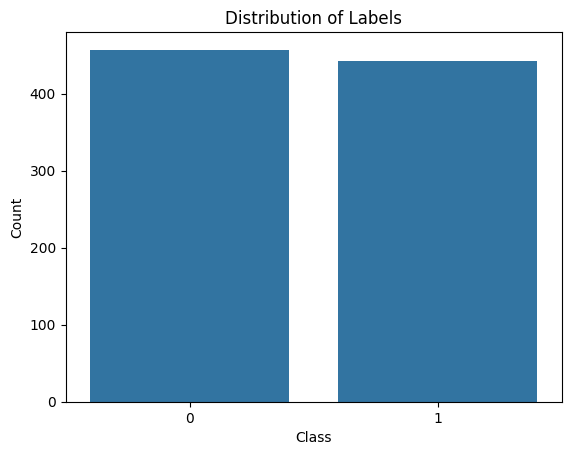

In [6]:
sns.countplot(x=ytrain, data=Xtrain)
plt.title("Distribution of Labels")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

### Pixel's Variance
This plot shows the **variance of each pixel** across all images in the dataset.

- The **lowest variance values** are seen at the beginning and end of the index range, which likely corresponds to pixels on the **edges or corners** of the images (usually background).
- The **central region** (roughly pixel indices 200–700) shows higher variance, meaning these pixels change more across images and likely capture the **main structure of the clothing items**.-

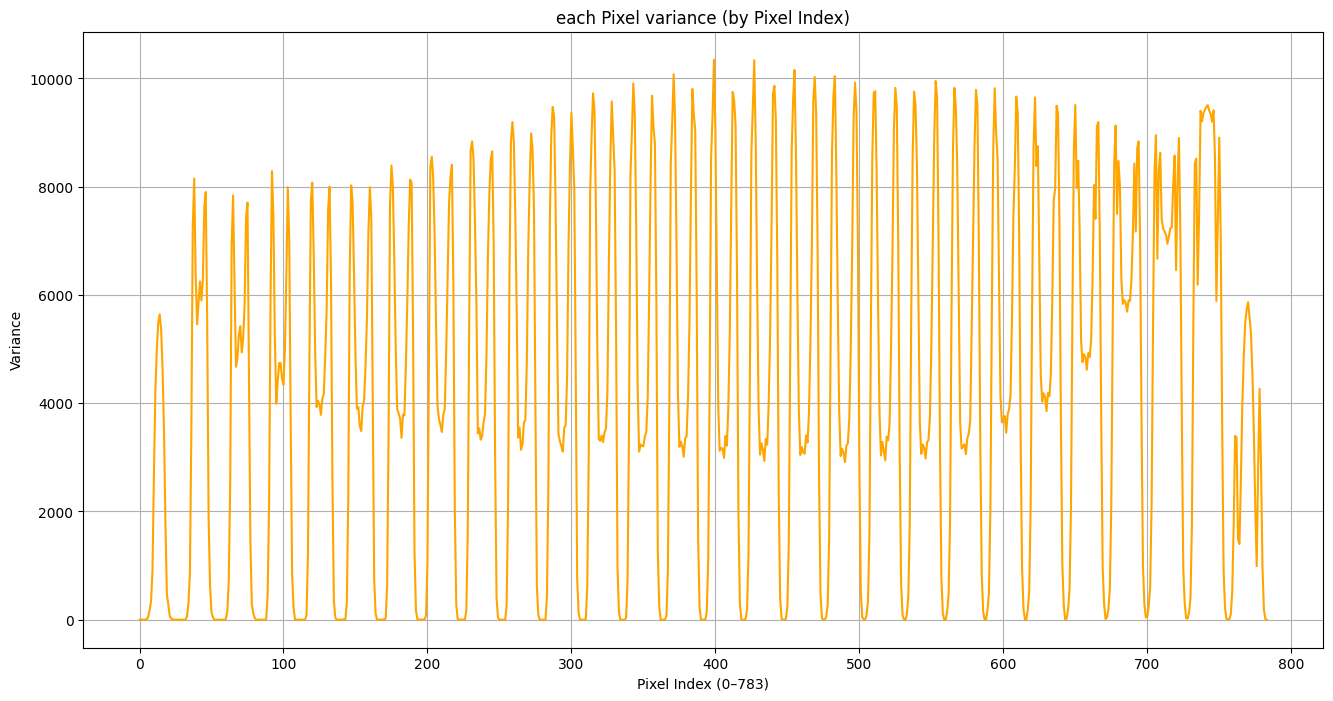

In [7]:
pixel_variance = Xtrain.var()

plt.figure(figsize=(16, 8))
plt.plot(pixel_variance.values, color='orange')
plt.title("each Pixel variance (by Pixel Index)")
plt.xlabel("Pixel Index (0–783)")
plt.ylabel("Variance")
plt.grid(True)
plt.show()

### Image Visualization

In the following plot, we visualize the first 10 images from the training dataset (`Xtrain`).  

From the displayed images, we can see that we are trying to **predict which type of clothing is shown** – whether the image is a
- **dress(label 1)**
- **coat(label 0)**

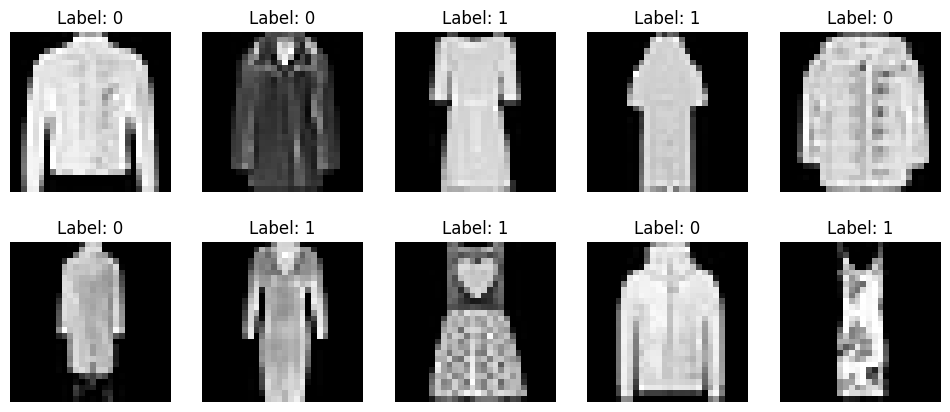

In [8]:
plt.figure(figsize=(12,5))
for i in range(10):
    img = Xtrain.iloc[i].values.reshape(28, 28)
    label = ytrain.iloc[i]
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')

### SVM 
Support Vector Machine is effective for this image classification task

- **High-Dimensional Input**  
  Each 28×28 grayscale image is represented as a 784-dimensional feature vector. SVM performs very well in high-dimensional spaces by focusing on support vectors and ignoring less relevant dimensions.

- **Non-linear Decision Boundaries with Kernels**  
  By using non-linear kernels such as the **Radial Basis Function (RBF)**, SVM can learn complex decision boundaries that better separate classes, even when they overlap in pixel space.

- **Good Generalization**  
  The `C` parameter helps control overfitting, while `gamma` adjusts the influence of individual training points. With proper tuning, SVM achieves high validation accuracy on unseen data.

In [9]:
def draw_graph(accuracies,params):
    figure = plt.figure(figsize = (14,7))
    ax = figure.add_subplot()
    ax.plot(params,accuracies,color = 'blue',linestyle = '-',marker = 'o')
    ax.grid(axis = 'y',color = 'green')
    ax.set_title("Validation Accuracy")
    ax.set_xlabel("Hyperparameter Combinations")
    ax.set_ylabel("Validation Accuracy")

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import ParameterGrid, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


def SVM_best_parameters(training_data=Xtrain, validation_data=Xval, parameter_combination=[]):
    accuracies = []
    for parameters in parameter_combination:
        clf = SVC(**parameters)
        clf.fit(training_data, ytrain)
        ypred = clf.predict(validation_data)
        acc = accuracy_score(yval, ypred)
        accuracies.append(acc)
    
    best_hyperparameters = parameter_combination[np.argmax(accuracies)]
    best_accuracy = np.max(accuracies)
    draw_graph(accuracies,range(len(parameter_combination)))
    print(f"Best hyperparameters for SVM are : {best_hyperparameters}")
    print(f"Best accuracy for SVM is: {best_accuracy:.2f}")

Best hyperparameters for SVM are : {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
Best accuracy for SVM is: 0.96


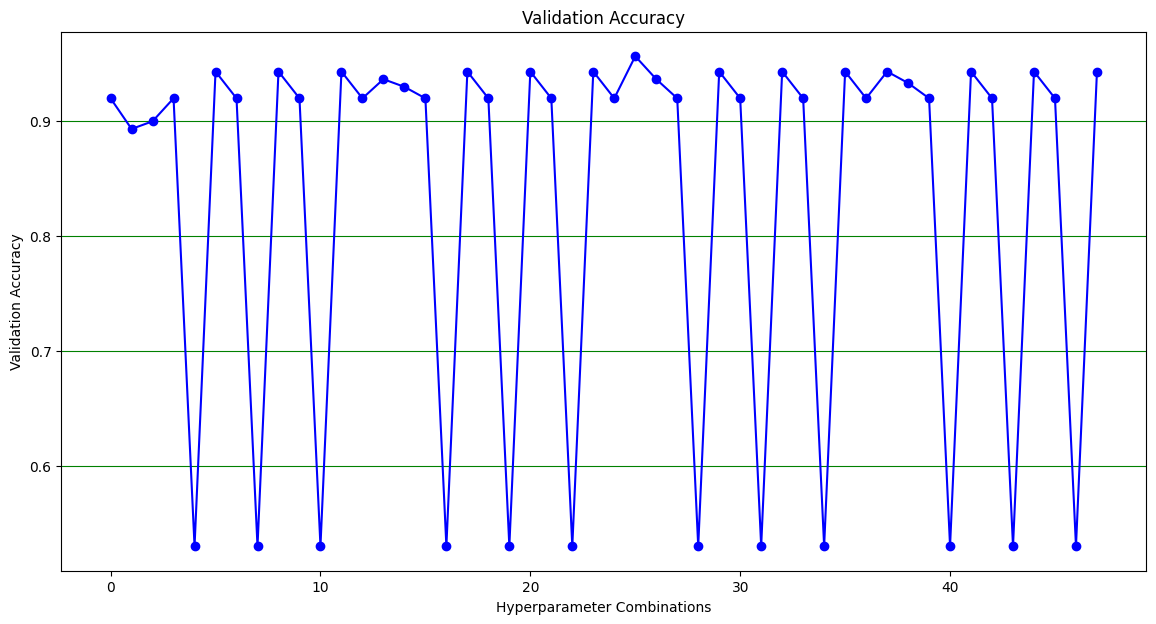

In [11]:
parameter_grid = {
        "kernel": ["linear", "rbf", "poly"], 
        "C": [0.1, 1, 10, 100],              
        "gamma": ["scale", 0.001, 0.01, 0.1]
    }
parameter_combination = ParameterGrid(parameter_grid)
SVM_best_parameters(parameter_combination=parameter_combination)

### SVM Hyperparameter Tuning – Validation Accuracy

The plot above shows the validation accuracy of various hyperparameter combinations for the Support Vector Machine (SVM) classifier.

- **X-axis**: Index of each tested hyperparameter combination (kernel, C, gamma)
- **Y-axis**: Validation accuracy on the held-out validation set

#### Observations:
- Many combinations achieve high accuracy (above 0.93), with the best reaching **95.7%**.
- The overall stability and peak performance confirm that SVM is highly effective for this classification task, especially with the **RBF kernel** and tuned regularization.

#### Best Result:
- **Kernel**: `'rbf'`
- **C**: `10`
- **Gamma**: `'scale'`
- **Best Validation Accuracy**: **0.96**

### 📦 Naive Bayes

Naive Bayes is very useful when:
  - You need **very fast training** (e.g. for real-time predictions).

But it also has limitations:
- **Pixel Independence Assumption**  
  In images, neighboring pixels are highly correlated (e.g. edges, shapes). Naive Bayes does not model these relationships, which can limit accuracy.

In [12]:
def bayes_best_parameters(training_data=Xtrain, validation_data=Xval, parameter_combination=[]):
    accuracies = []
    for parameters in parameter_combination:
        clf = GaussianNB(**parameters)
        clf.fit(training_data, ytrain)
        ypred = clf.predict(validation_data)
        acc = accuracy_score(yval, ypred)
        accuracies.append(acc)
    
    best_hyperparameters = parameter_combination[np.argmax(accuracies)]
    best_accuracy = np.max(accuracies)
    draw_graph(accuracies,range(len(parameter_combination)))
    print(f"Best hyperparameters for bayes are : {best_hyperparameters}")
    print(f"Best accuracy for bayes is: {best_accuracy:.2f}")

Best hyperparameters for bayes are : {'var_smoothing': np.float64(0.0021544346900318778)}
Best accuracy for bayes is: 0.87


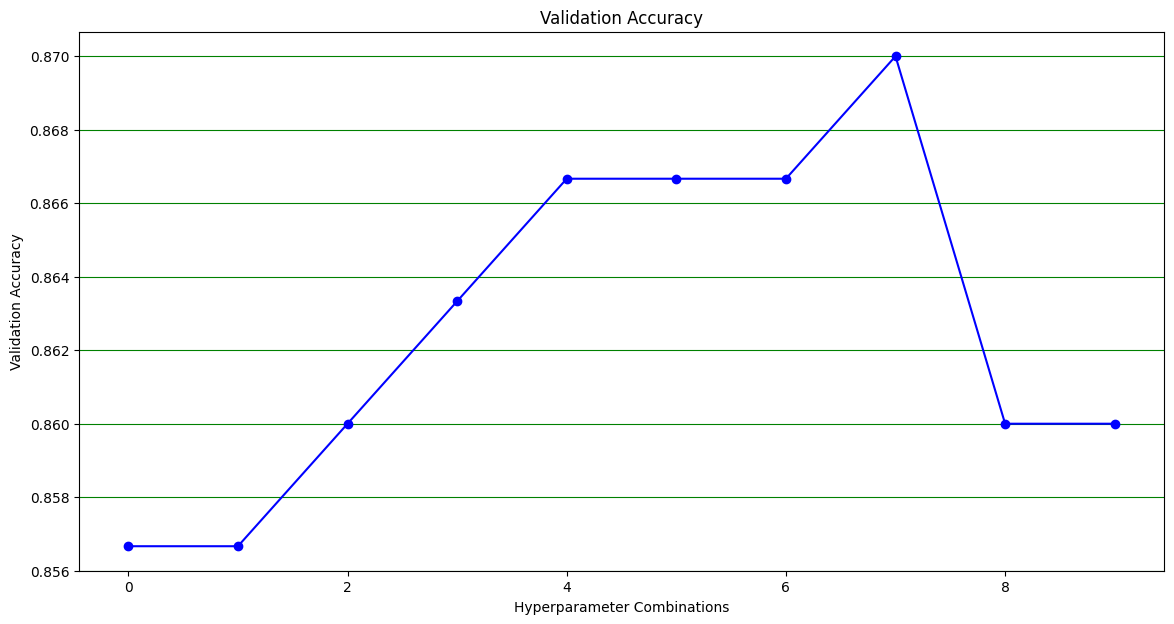

In [13]:
parameter_grid = {
        "var_smoothing": np.logspace(-12, 0, 10)
    }
parameter_combination = ParameterGrid(parameter_grid)
bayes_best_parameters(parameter_combination=parameter_combination)

### Naive Bayes – Hyperparameter Tuning: Validation Accuracy

The graph above shows how different values of the `var_smoothing` hyperparameter affect the performance of the Naive Bayes classifier.

- **X-axis**: Index of each tested `var_smoothing` value (logarithmic scale)
- **Y-axis**: Validation accuracy for each configuration

#### Observations:
- The accuracy gradually improves as we increase `var_smoothing`, peaking at index 7.
- A sudden drop in performance after that suggests that **too much smoothing** harms the model’s ability to distinguish between classes.
- Naive Bayes is relatively stable but sensitive to this parameter.

#### Best Result:
- **Best `var_smoothing`**: `0.00215`
- **Best Validation Accuracy**: **0.87**


### Linear Discriminant Analysis (LDA) – Strengths and Limitations

#### Why LDA Can Be a Good Fit

- **Works Well with High-Dimensional Data**  
  LDA is capable of handling data with a large number of features (e.g. 784 pixels), especially when regularization (`shrinkage`) is used.

- **Dimensionality Reduction and Classification in One**
  LDA finds a lower-dimensional space that best separates the classes. This makes it both a feature reduction method and a classifier.


In [14]:
def lda_best_parameters(training_data=Xtrain, validation_data=Xval, parameter_combination = []):
    accuracies = []
    for parameters in parameter_combination:
        clf = LinearDiscriminantAnalysis(**parameters)
        clf.fit(training_data, ytrain)
        ypred = clf.predict(validation_data)
        acc = accuracy_score(yval, ypred)
        accuracies.append(acc)
    
    best_hyperparameters = parameter_combination[np.argmax(accuracies)]
    best_accuracy = np.max(accuracies)
    draw_graph(accuracies,range(len(parameter_combination)))
    print(f"Best hyperparameters for lda are : {best_hyperparameters}")
    print(f"Best accuracy for LDA is: {best_accuracy:.2f}")

Best hyperparameters for lda are : {'solver': 'lsqr', 'shrinkage': 'auto'}
Best accuracy for LDA is: 0.93


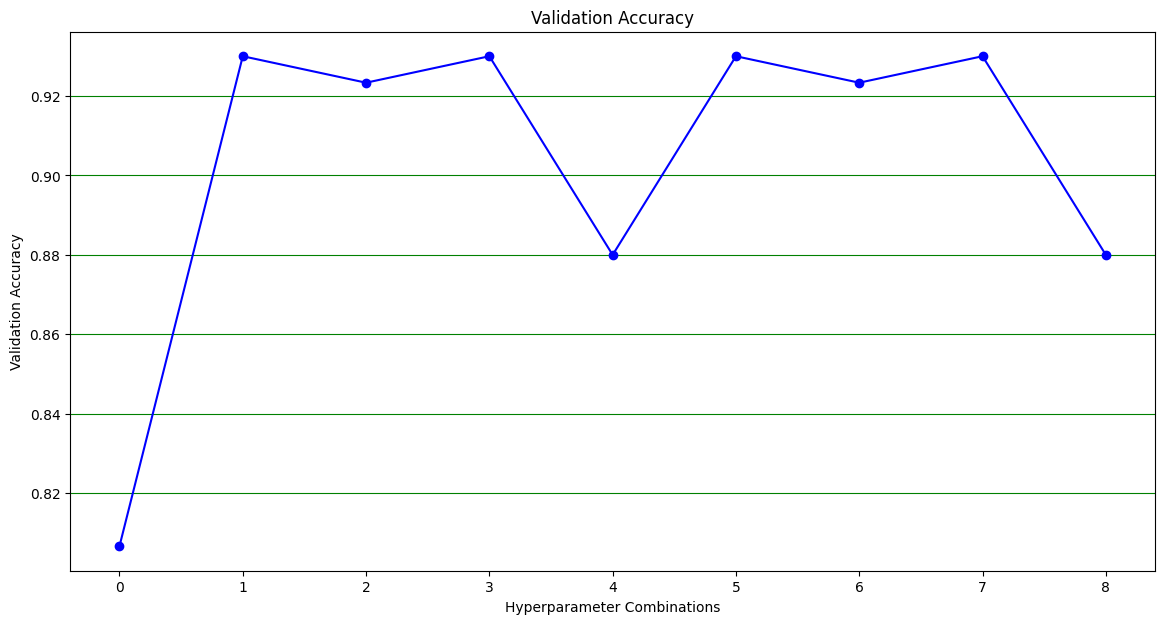

In [15]:
parameter_combination = []
for solver in ["svd", "lsqr", "eigen"]:
        if solver == "svd":
            parameter_combination.append({"solver": solver, "shrinkage": None})
        else:
            for shrinkage in ["auto", 0.1, 0.5, 1.0]:
                parameter_combination.append({
                    "solver": solver,
                    "shrinkage": shrinkage
                })
lda_best_parameters(parameter_combination=parameter_combination)

### LDA – Hyperparameter Tuning: Validation Accuracy

This plot illustrates the performance of the Linear Discriminant Analysis (LDA) classifier for different combinations of solver and shrinkage values.

- **X-axis**: Index of each (solver, shrinkage) configuration tested
- **Y-axis**: Corresponding validation accuracy

#### Observations:
- The model consistently performs well across most configurations, with several combinations achieving over **92%** accuracy.
- The best performance is obtained with the **`lsqr` solver and `shrinkage='auto'`**, reaching **93%** accuracy.
- A few combinations result in noticeable drops in accuracy, indicating that the choice of solver and regularization (shrinkage) significantly impacts LDA's effectiveness.

#### Best Result:
- **Solver**: `lsqr`
- **Shrinkage**: `'auto'`
- **Best Validation Accuracy**: **0.93**


### Data Generation using Linear Discriminant Analysis (LDA)

In this experiment, we use the generative properties of the trained LDA model to generate new synthetic samples for each class.

- We obtain the class-specific means and shared covariance matrix from the fitted LDA model.
- Using `np.random.multivariate_normal`, we generate 5 synthetic samples for **Class 0** and 5 for **Class 1**.
- Each sample is reshaped into a 28x28 grayscale image and visualized with `imshow`.

#### Observations:
- The generated samples reflect the general shape and texture of the original data.
- They appear more **blurry and averaged**, which is expected since LDA models only first and second moments (mean and variance).
- Still, the basic structure (e.g., dress-like shapes) is distinguishable, showing that LDA captures some global features of the data.
- However, fine-grained or nonlinear features are not preserved.

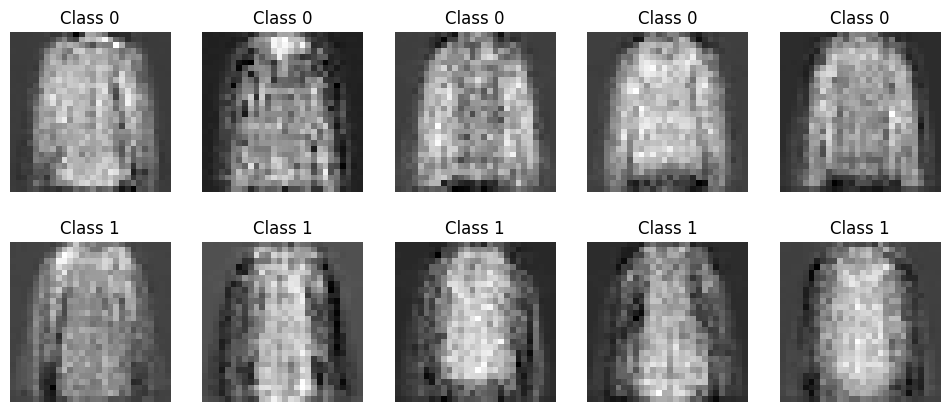

In [16]:
clf = LinearDiscriminantAnalysis(solver="lsqr", shrinkage="auto")
clf.fit(Xtrain,ytrain)

plt.figure(figsize=(12, 5))
for i in range(5):
    class_0 = np.random.multivariate_normal(clf.means_[0], clf.covariance_)
    class_1 = np.random.multivariate_normal(clf.means_[1], clf.covariance_)
    img = class_0.reshape(28, 28)
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Class 0")
    plt.axis("off")
    img = class_1.reshape(28, 28)
    plt.subplot(2, 5, i+6)
    plt.imshow(img, cmap="gray")
    plt.title(f"Class 1")
    plt.axis("off")

plt.show()

## Principal Component Analysis (PCA) – Dimensionality Reduction & Evaluation

In this section, we apply **Principal Component Analysis (PCA)** to reduce the dimensionality of our input dataset before fitting different models. The goal is to evaluate how model performance changes with lower-dimensional input, while preserving as much variance from the original data as possible.

---

### Setup

- **Original Feature Size**: 784 (28x28 image pixels)
- **Tested PCA Dimensions**: 100, 50, 10

In [17]:
from sklearn.decomposition import PCA

dimensions = [100, 50, 10]
max_dimension = max(dimensions)

pca = PCA(n_components=max_dimension)
pca.fit(Xtrain)
reduced_train_max = pca.transform(Xtrain)
reduced_val_max = pca.transform(Xval)

def apply_pca(model, parameter_combination):
    for dim in dimensions:
        print(f"{model} for PCA:{dim}")
        reduced_train = reduced_train_max[:, :dim]
        reduced_val = reduced_val_max[:, :dim]
        if model == "SVM":
            SVM_best_parameters(training_data=reduced_train, validation_data=reduced_val, parameter_combination=parameter_combination)
        elif model == "bayes":
            bayes_best_parameters(reduced_train, reduced_val, parameter_combination=parameter_combination)
        elif model == "lda":
            lda_best_parameters(reduced_train, reduced_val, parameter_combination=parameter_combination)

SVM for PCA:100
Best hyperparameters for SVM are : {'kernel': 'linear', 'C': 0.1}
Best accuracy for SVM is: 0.91
SVM for PCA:50
Best hyperparameters for SVM are : {'kernel': 'linear', 'C': 0.1}
Best accuracy for SVM is: 0.93
SVM for PCA:10
Best hyperparameters for SVM are : {'kernel': 'linear', 'C': 1}
Best accuracy for SVM is: 0.94


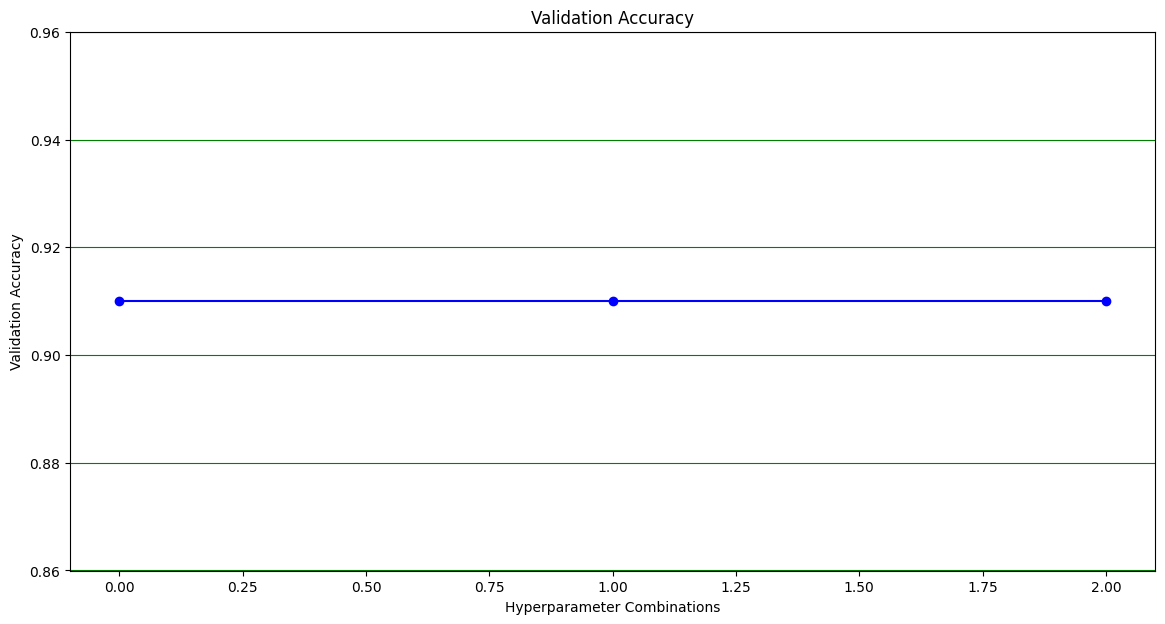

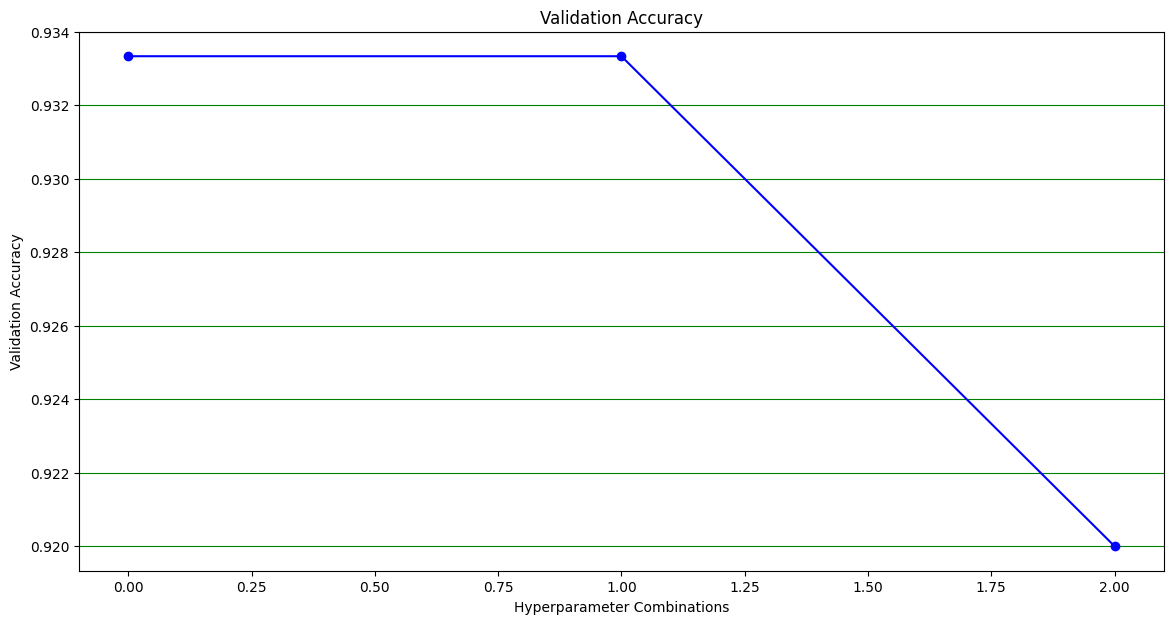

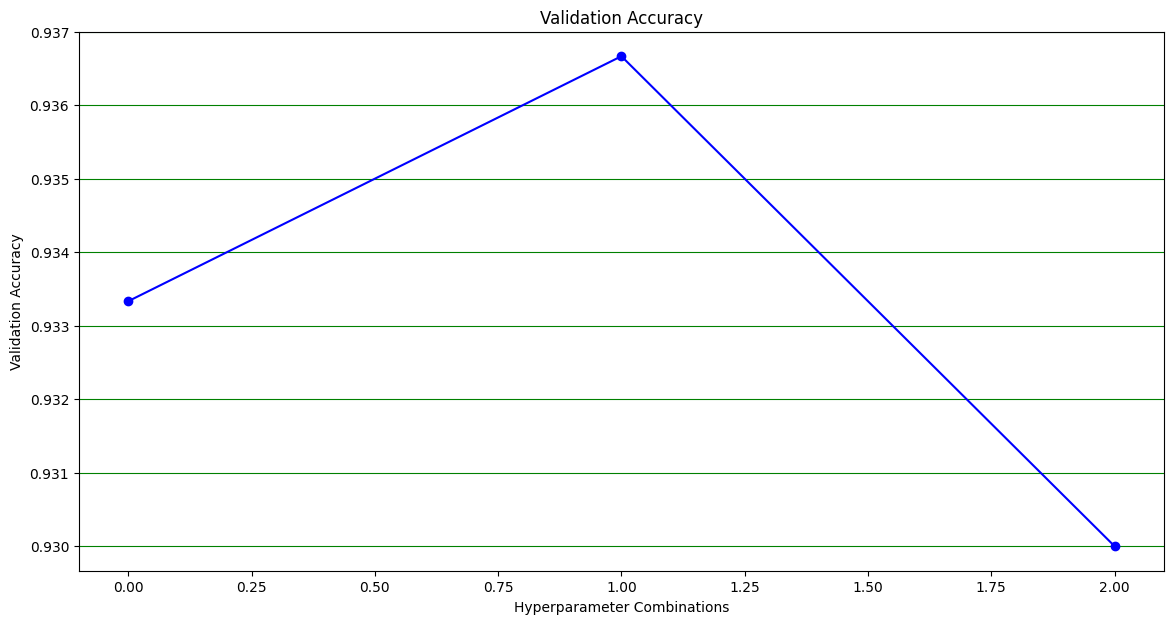

In [18]:
parameter_grid = {
        "kernel": ["linear"], 
        "C": [0.1, 1, 10]
    }
parameter_combination = ParameterGrid(parameter_grid)
apply_pca(model="SVM", parameter_combination=parameter_combination)

## PCA + Naive Bayes

### Accuracy Results by PCA Dimension

| PCA Components | Best Accuracy | Best `var_smoothing` |
|----------------|---------------|-----------------------|
| 10             | 0.90          | 1e-12                 |
| 50             | 0.89          | ≈2e-3                 |
| 100            | **0.91**      | ≈2e-3                 |

 **Observation:** Surprisingly, even with only 10 dimensions, Naive Bayes performs competitively. This suggests that PCA preserved enough of the variance needed for classification even in a very low-dimensional subspace.


### Insights

-  **100 components** gave the **highest accuracy**, indicating that more features help retain meaningful class differences—even for a simple model like Naive Bayes.
-  **50 components** slightly underperformed, possibly due to the loss of subtle discriminative patterns.
-  **10 components** still achieved 90% accuracy! This highlights how effective PCA can be at compressing image data while preserving key structure.

### Conclusion
Bayes + PCA showed better results than a Bayes without reduced dimensionality

bayes for PCA:100
Best hyperparameters for bayes are : {'var_smoothing': np.float64(0.0021544346900318778)}
Best accuracy for bayes is: 0.90
bayes for PCA:50
Best hyperparameters for bayes are : {'var_smoothing': np.float64(0.0021544346900318778)}
Best accuracy for bayes is: 0.89
bayes for PCA:10
Best hyperparameters for bayes are : {'var_smoothing': np.float64(1e-12)}
Best accuracy for bayes is: 0.90


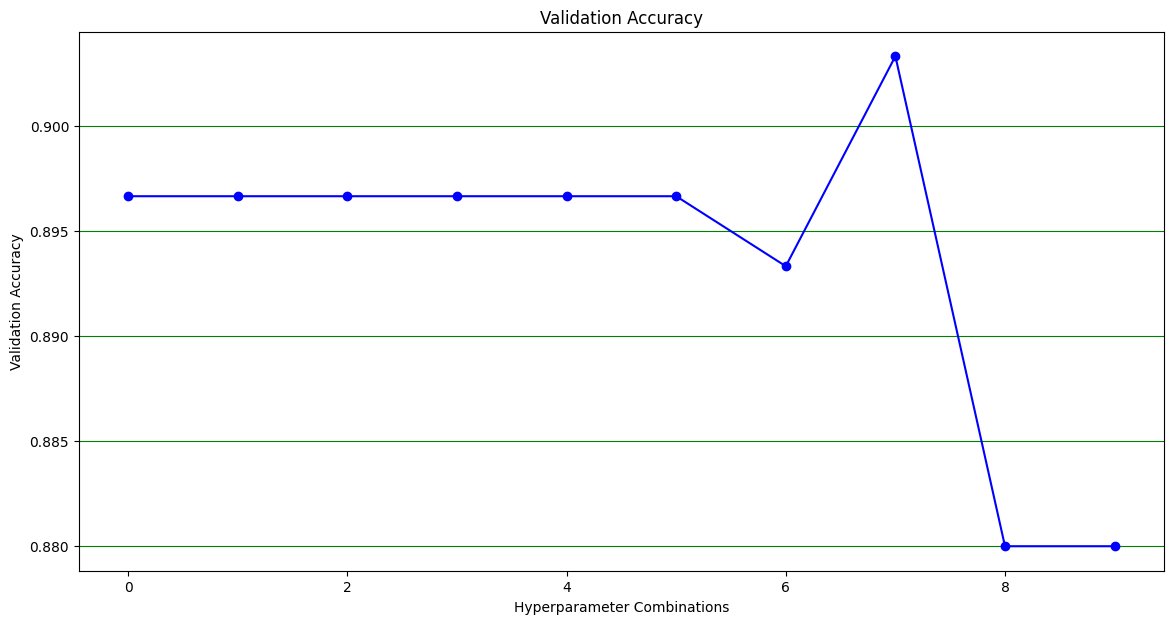

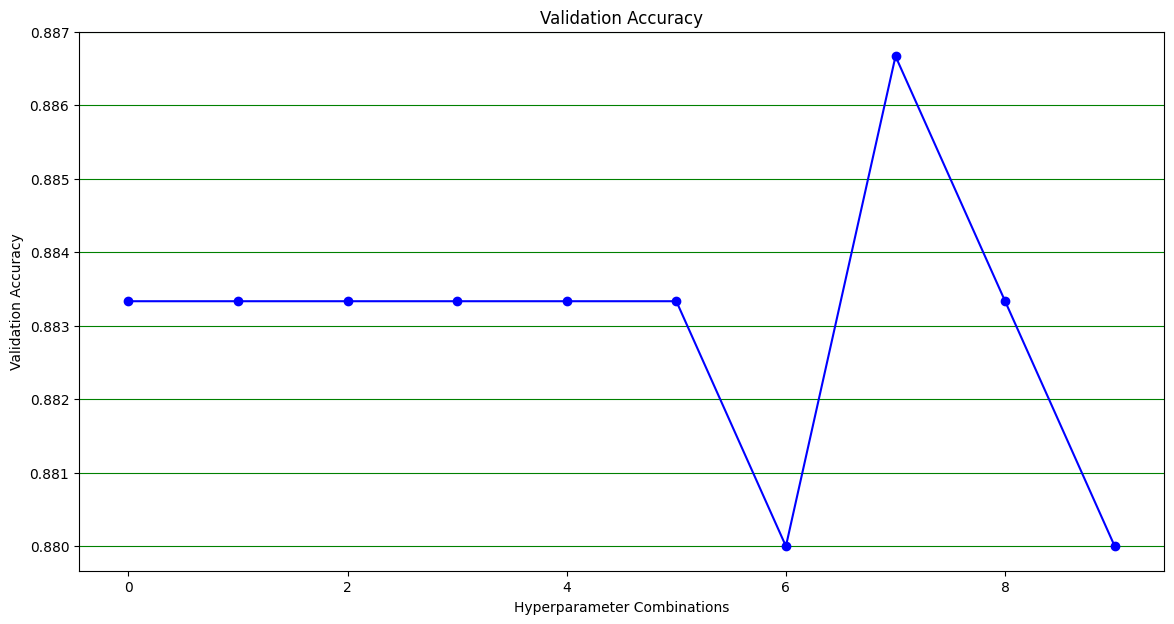

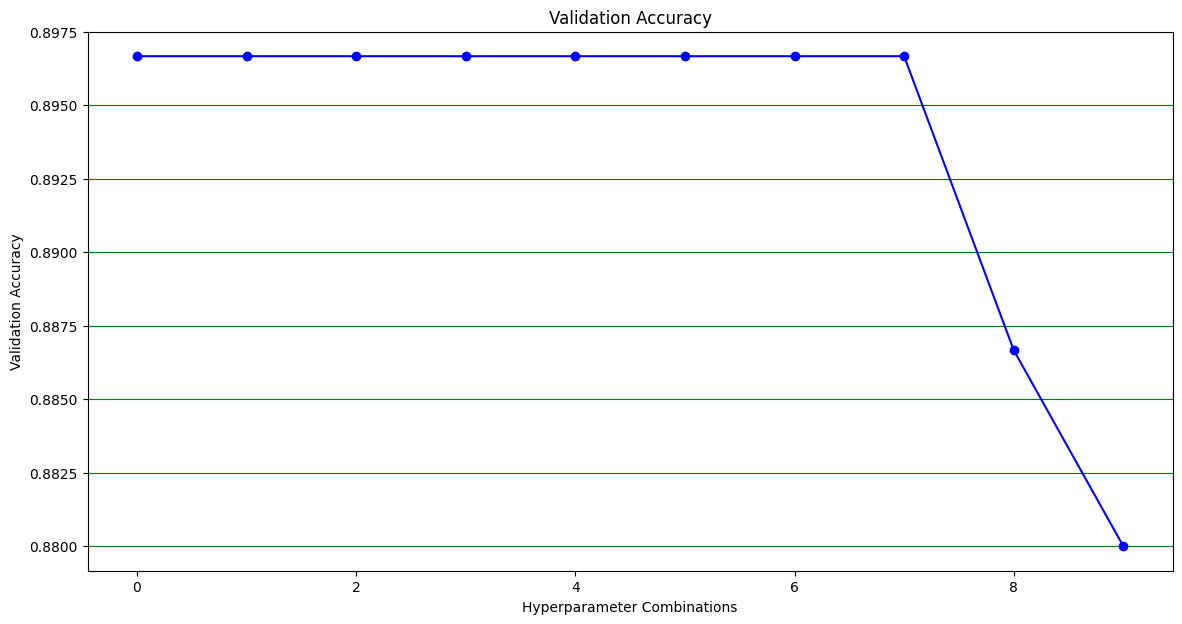

In [19]:
parameter_grid = {
    "var_smoothing": np.logspace(-12, 0, 10)
}
parameter_combination = ParameterGrid(parameter_grid)
apply_pca(model="bayes", parameter_combination=parameter_combination)

## PCA + LDA


| PCA Components | Best Accuracy | Best Parameters                            |
|----------------|----------------|---------------------------------------------|
| 10             | 0.92           | `{'solver': 'svd', 'shrinkage': None}`      |
| 50             | 0.93           | `{'solver': 'svd', 'shrinkage': None}`      |
| 100            | **0.93**       | `{'solver': 'lsqr', 'shrinkage': 0.1}`      |

### Observations

- Both **50 and 100 components** led to the highest accuracy of **0.93**, showing that enough variance must be retained for LDA to distinguish between classes effectively.
- Surprisingly, **10 components still yielded strong results (0.92)**, suggesting that LDA can remain robust even under strong dimensional compression.
- The model benefited slightly from using `lsqr` with shrinkage when working with more components.

### Conclusion

LDA performs very well on PCA-transformed data, and results show only minimal performance degradation with dimensionality reduction. This makes LDA a solid and interpretable model for reduced-feature spaces.


lda for PCA:100
Best hyperparameters for lda are : {'solver': 'lsqr', 'shrinkage': 0.1}
Best accuracy for LDA is: 0.93
lda for PCA:50
Best hyperparameters for lda are : {'solver': 'svd', 'shrinkage': None}
Best accuracy for LDA is: 0.93
lda for PCA:10
Best hyperparameters for lda are : {'solver': 'svd', 'shrinkage': None}
Best accuracy for LDA is: 0.92


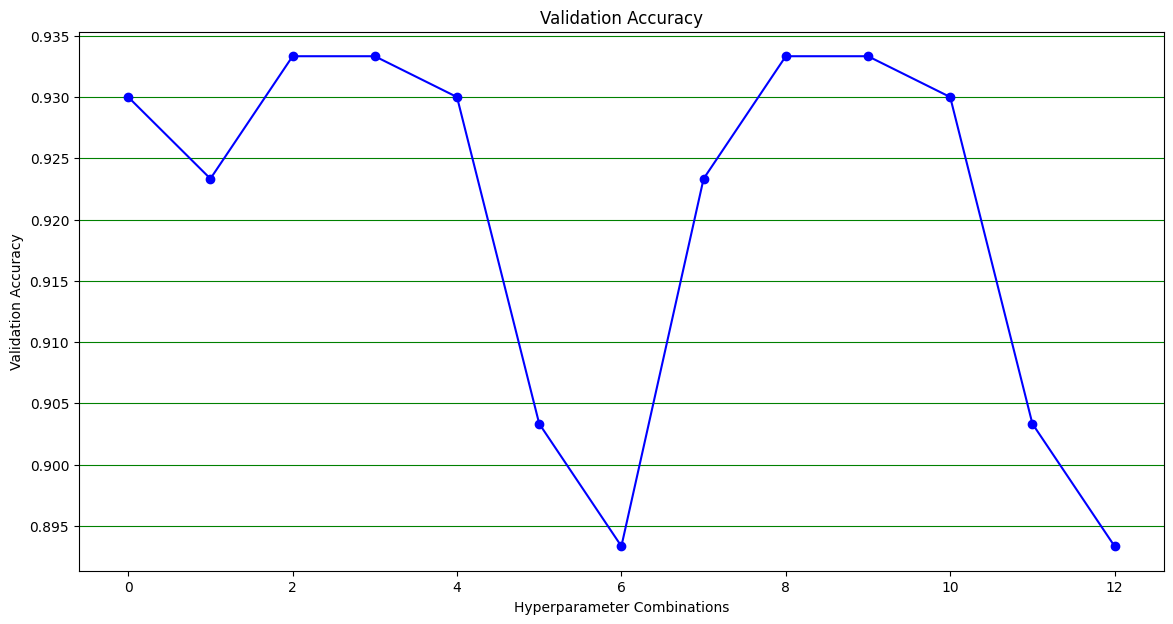

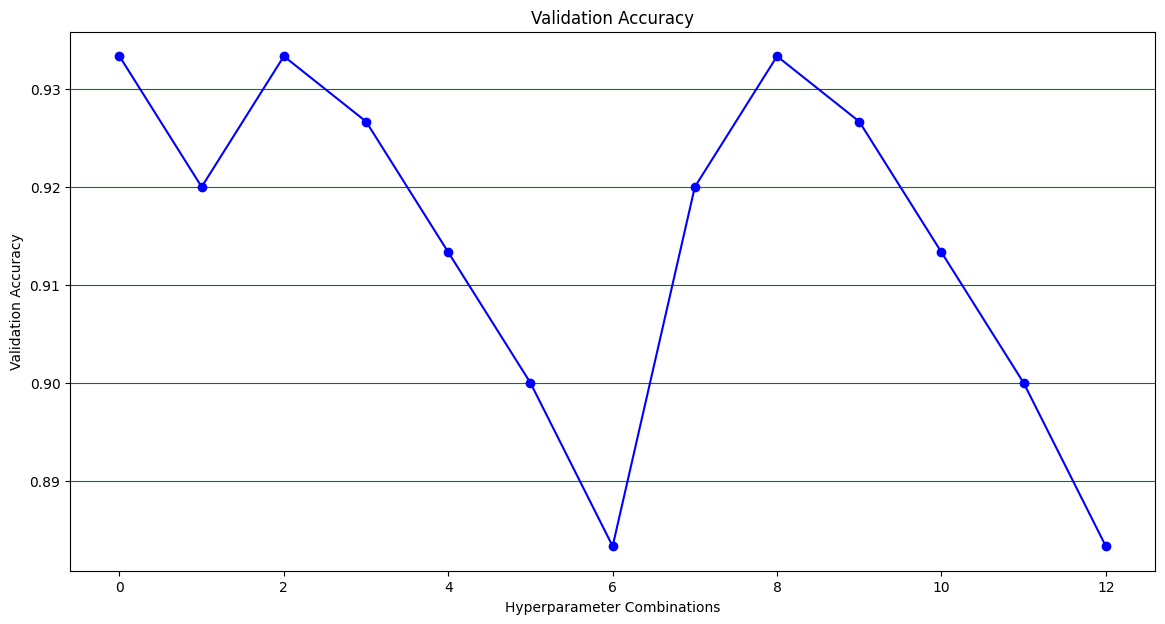

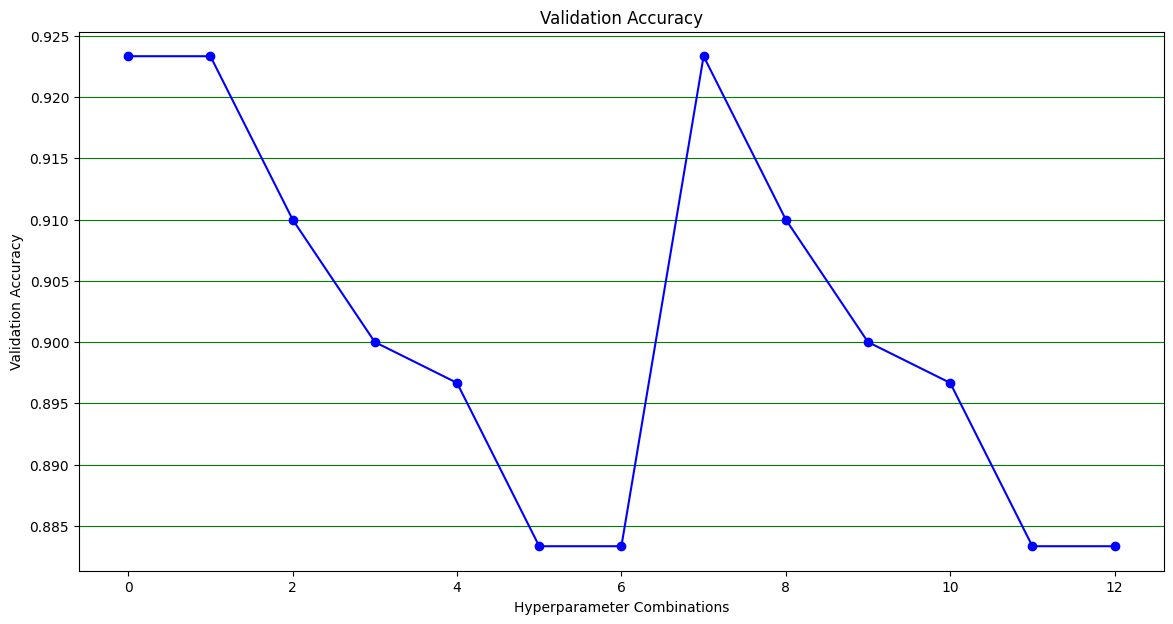

In [20]:
parameter_combination = []
for solver in ["svd", "lsqr", "eigen"]:
    if solver == "svd":
        parameter_combination.append({"solver": solver, "shrinkage": None})
    else:
        for shrink in ["auto", 0.1, 0.3, 0.5, 0.7, 0.9]:
            parameter_combination.append({
                "solver": solver,
                "shrinkage": shrink
            })
apply_pca(model="lda", parameter_combination=parameter_combination)

## Locally Linear Embedding (LLE) Dimensionality Reduction & Evaluation

In this section, we apply **Locally Linear Embedding (LLE)** to reduce the dimensionality of our dataset before evaluating model performance. LLE is particularly well-suited for data that lies on a **nonlinear manifold**, preserving local structures rather than global variance like PCA.

---

### Setup

- **Original Feature Size**: 784 (28x28 image pixels)
- **Tested LLE Dimensions**: 8, 5, 3
- **Neighbors Parameter**: `n_neighbors = 10`
- **Reduction Method**: `method='modified'` used for more stability

In [21]:
from sklearn.manifold import LocallyLinearEmbedding

dimensions = [8, 5, 3]

def apply_lle(model, parameter_combination):
    for dim in dimensions:
        print(f"{model} for PCA:{dim}")
        lle = LocallyLinearEmbedding(n_components=dim, n_neighbors=10, method='modified')
        reduced_train = lle.fit_transform(Xtrain)
        reduced_val = lle.transform(Xval)
        if model == "SVM":
            SVM_best_parameters(reduced_train, reduced_val, parameter_combination)
        elif model == "bayes":
            bayes_best_parameters(reduced_train, reduced_val, parameter_combination)
        elif model == "lda":
            lda_best_parameters(reduced_train, reduced_val, parameter_combination)

## Locally Linear Embedding (LLE) + SVM

| LLE Dimensions | Best Accuracy | Best SVM Parameters           |
|----------------|----------------|-------------------------------|
| 3              | 0.90           | `{'kernel': 'rbf', 'C': 100}` |
| 5              | 0.90           | `{'kernel': 'poly', 'C': 100}`|
| 8              | **0.92**       | `{'kernel': 'rbf', 'C': 10}`  |

### Comparison to Original SVM 

- **Original Accuracy** (no LLE or PCA): **0.96**
- This shows a slight performance drop (~4%) after applying LLE

### Observations

- LLE with **8 dimensions** provided the best accuracy (0.92).
- **RBF and polynomial kernels** consistently outperformed the linear kernel across all reduced dimensions.

### Conclusion

SVM + LLE did not show better results than SWM without reduced dimensionality

SVM for PCA:8
Best hyperparameters for SVM are : {'kernel': 'rbf', 'C': 10}
Best accuracy for SVM is: 0.92
SVM for PCA:5
Best hyperparameters for SVM are : {'kernel': 'poly', 'C': 100}
Best accuracy for SVM is: 0.90
SVM for PCA:3
Best hyperparameters for SVM are : {'kernel': 'rbf', 'C': 100}
Best accuracy for SVM is: 0.90


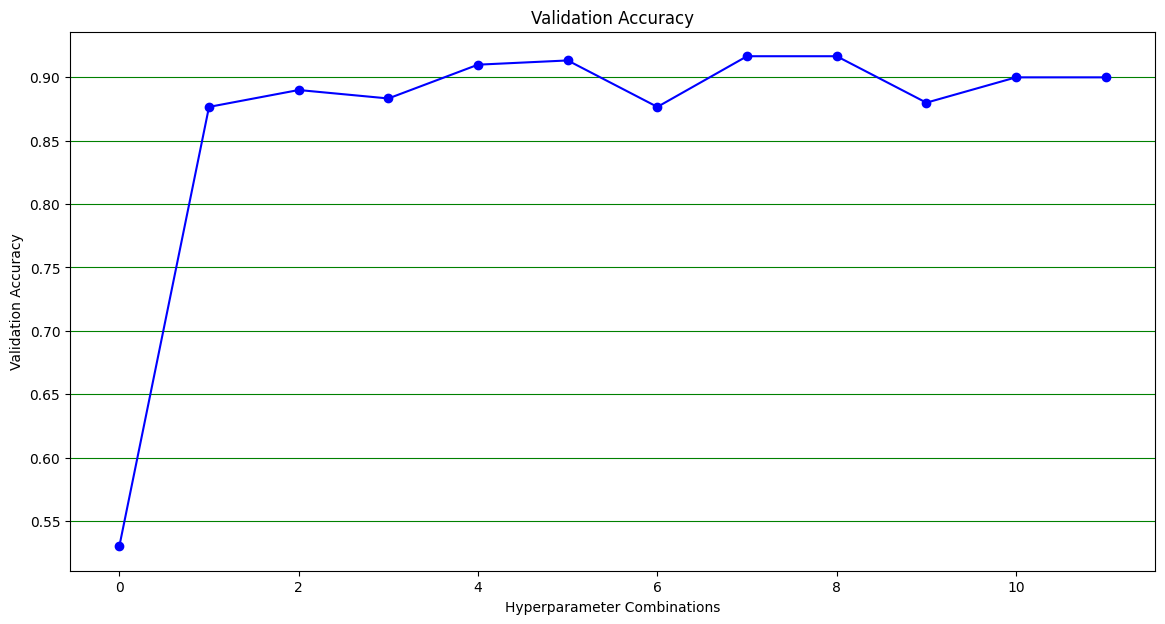

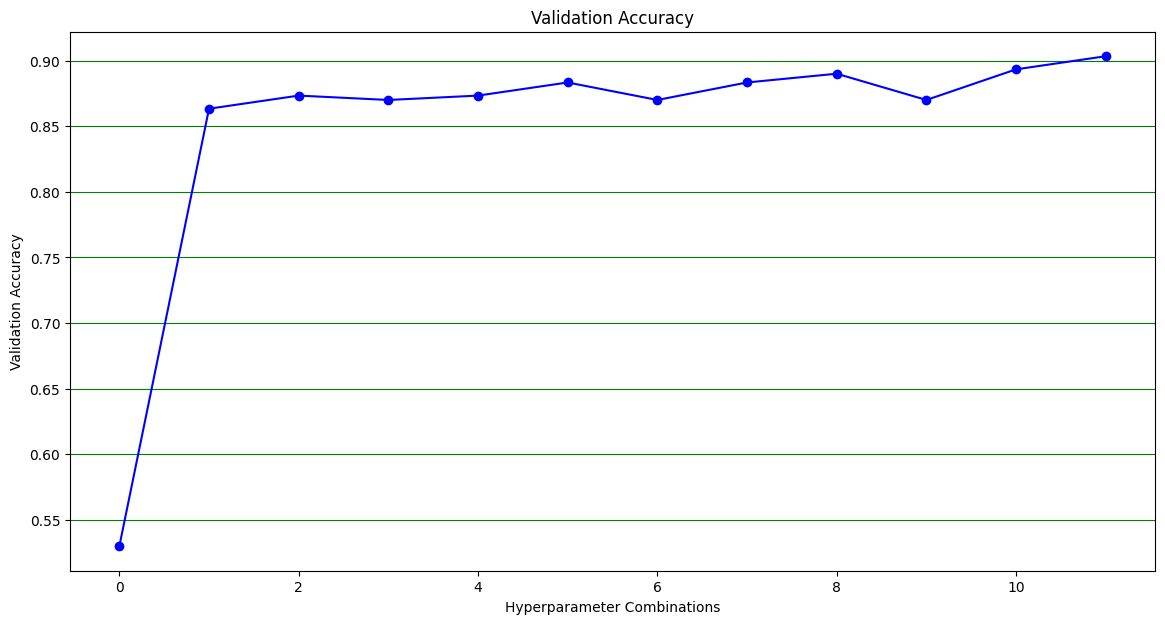

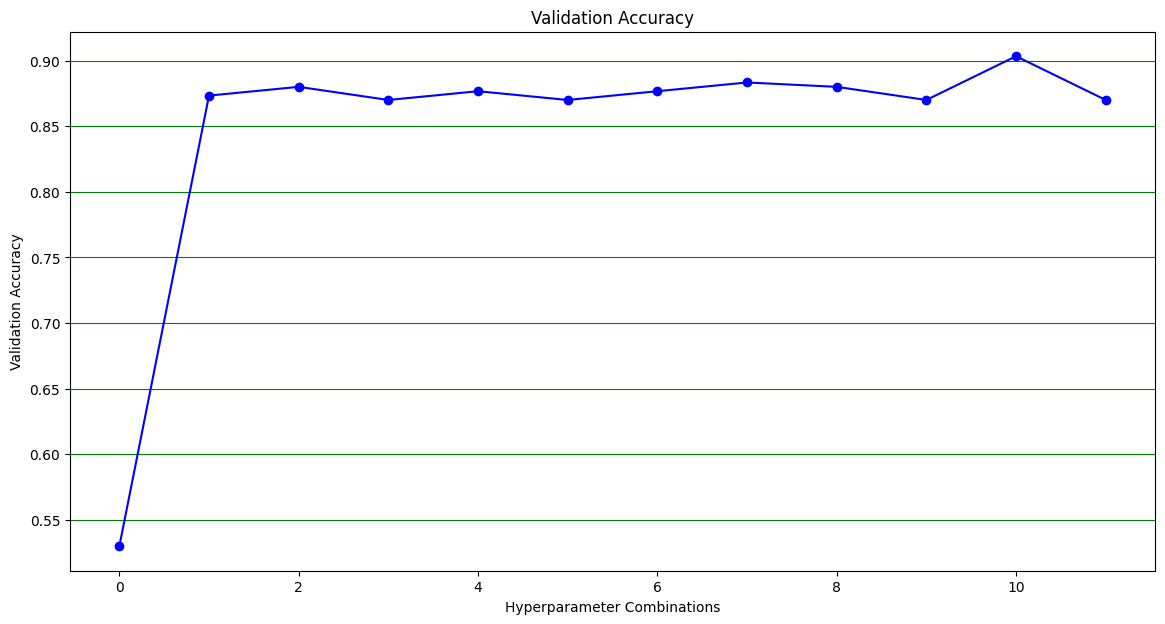

In [22]:
parameter_grid = {
        "kernel": ["linear", "rbf", "poly"], 
        "C": [0.1, 1, 10, 100]
    }
parameter_combination = ParameterGrid(parameter_grid)
apply_lle(model="SVM", parameter_combination=parameter_combination)

## Locally Linear Embedding (LLE) + Naive Bayes

| LLE Dimensions | Best Accuracy | Best `var_smoothing`         |
|----------------|---------------|-------------------------------|
| 3              | **0.88**      | 1e-12                         |
| 5              | **0.88**      | 1e-12                         |
| 8              | 0.87          | 1e-12                         |

### Insights

- **Stable but Limited**: Accuracy remained stable across 3–5 dimensions and then slightly dropped at 8. This suggests LLE didn't enhance Naive Bayes performance significantly.
- **Overall Performance**: Even after reduction, the model performed decently (~0.88), though it did not match its performance on PCA-reduced or original data (up to 0.91).

### Conclusion

Bayes + PCA showed better results than Bayes + LLE

bayes for PCA:8
Best hyperparameters for bayes are : {'var_smoothing': np.float64(1e-12)}
Best accuracy for bayes is: 0.87
bayes for PCA:5
Best hyperparameters for bayes are : {'var_smoothing': np.float64(1e-12)}
Best accuracy for bayes is: 0.88
bayes for PCA:3
Best hyperparameters for bayes are : {'var_smoothing': np.float64(1e-12)}
Best accuracy for bayes is: 0.88


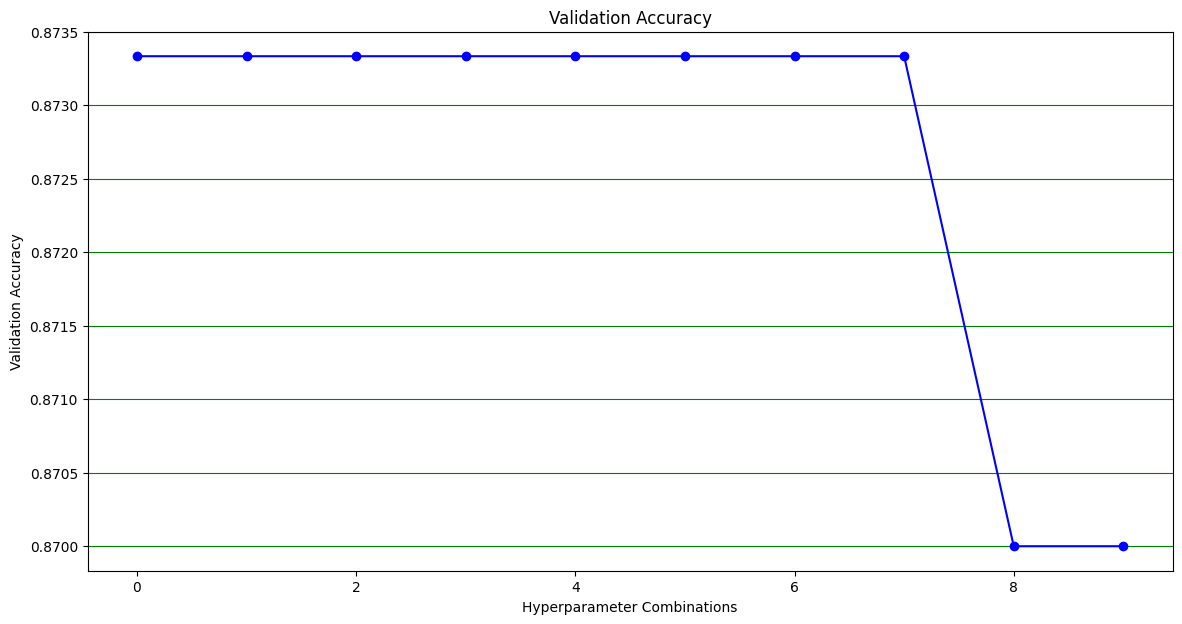

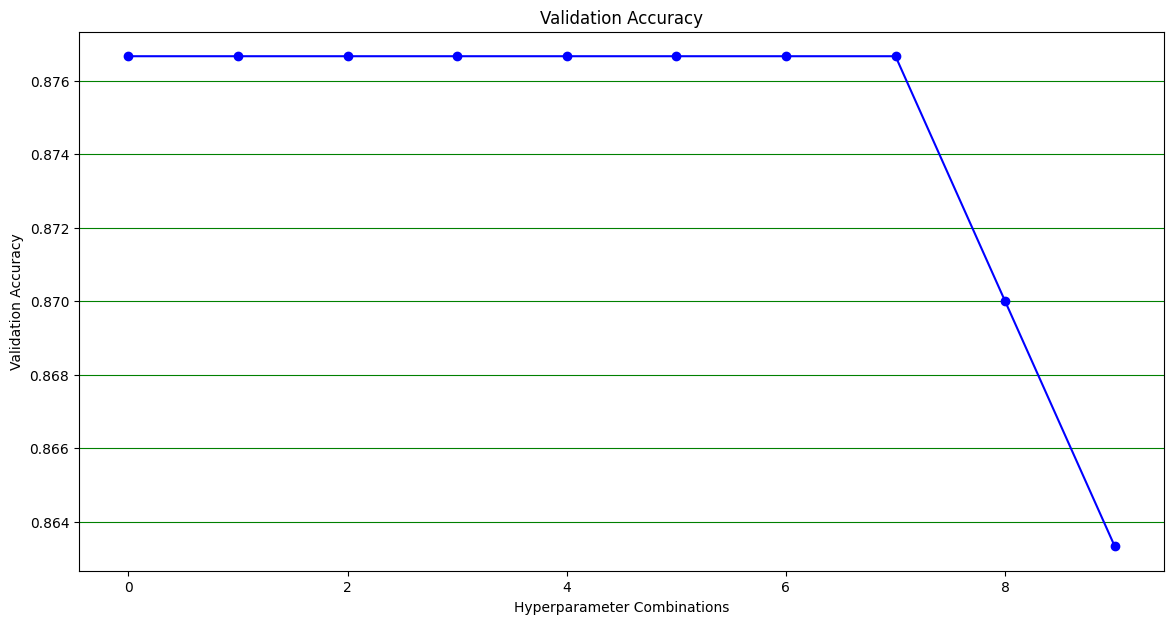

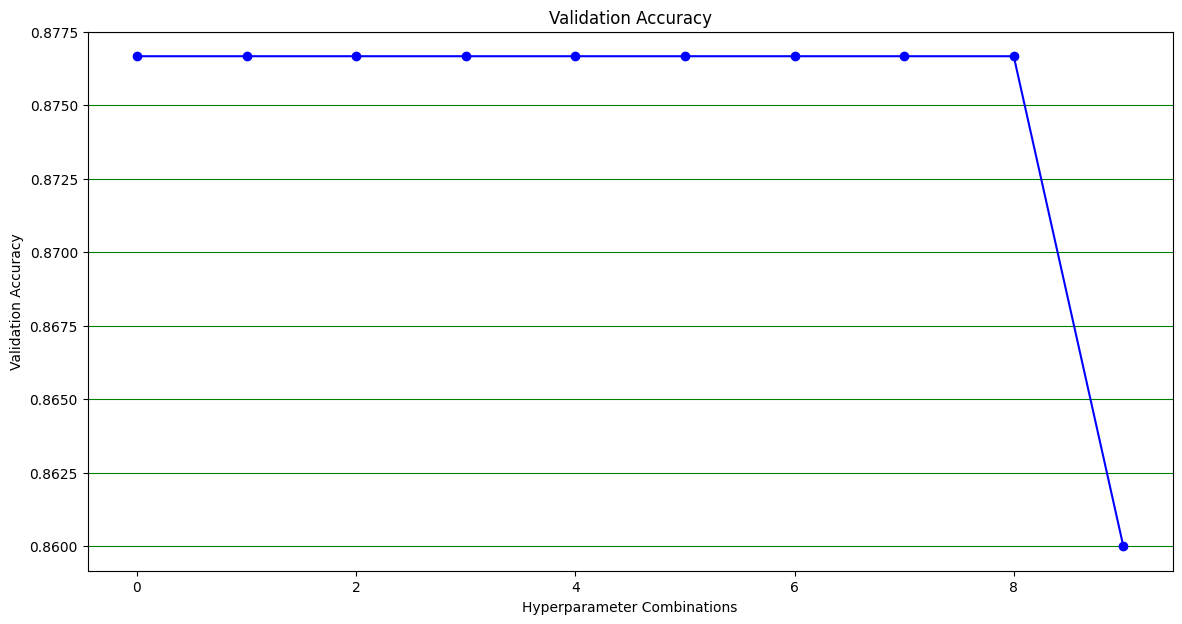

In [23]:
parameter_grid = {
    "var_smoothing": np.logspace(-12, 0, 10)
}
parameter_combination = ParameterGrid(parameter_grid)
apply_lle(model="bayes", parameter_combination=parameter_combination)

## 📉 Locally Linear Embedding (LLE) + LDA


| LLE Components | Best Solver & Shrinkage           | Accuracy |
|----------------|-----------------------------------|----------|
| 3              | `svd`, `shrinkage=None`           | 0.88     |
| 5              | `lsqr`, `shrinkage='auto'`        | 0.88     |
| 8              | `lsqr`, `shrinkage='auto'`        | 0.89     |

---

### Observations

- The best result (0.89) was achieved with **8 components**, using the **`lsqr` solver** and **automatic shrinkage**.
- Accuracy remained relatively stable across different dimensionalities, showing LDA is fairly robust even with aggressive reduction.
- Results are still below the original LDA performance without reduction (which reached **0.93**).

### Conclusion

LLE + LDA did not show better results than LLE without reduction

lda for PCA:8
Best hyperparameters for lda are : {'solver': 'lsqr', 'shrinkage': 'auto'}
Best accuracy for LDA is: 0.89
lda for PCA:5
Best hyperparameters for lda are : {'solver': 'lsqr', 'shrinkage': 'auto'}
Best accuracy for LDA is: 0.88
lda for PCA:3
Best hyperparameters for lda are : {'solver': 'svd', 'shrinkage': None}
Best accuracy for LDA is: 0.88


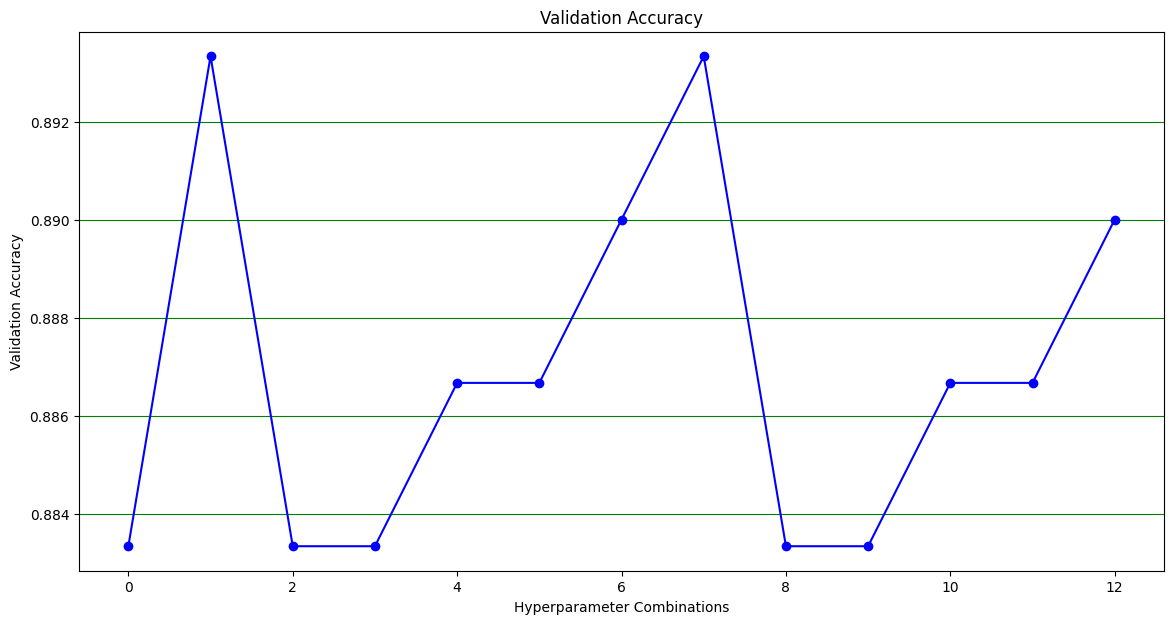

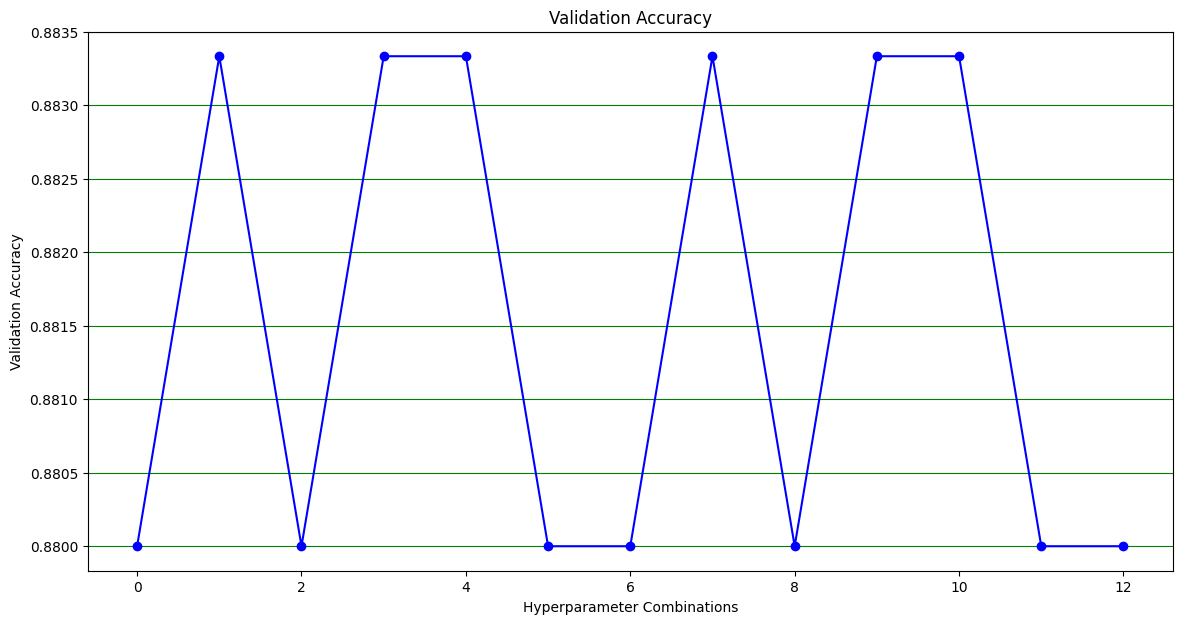

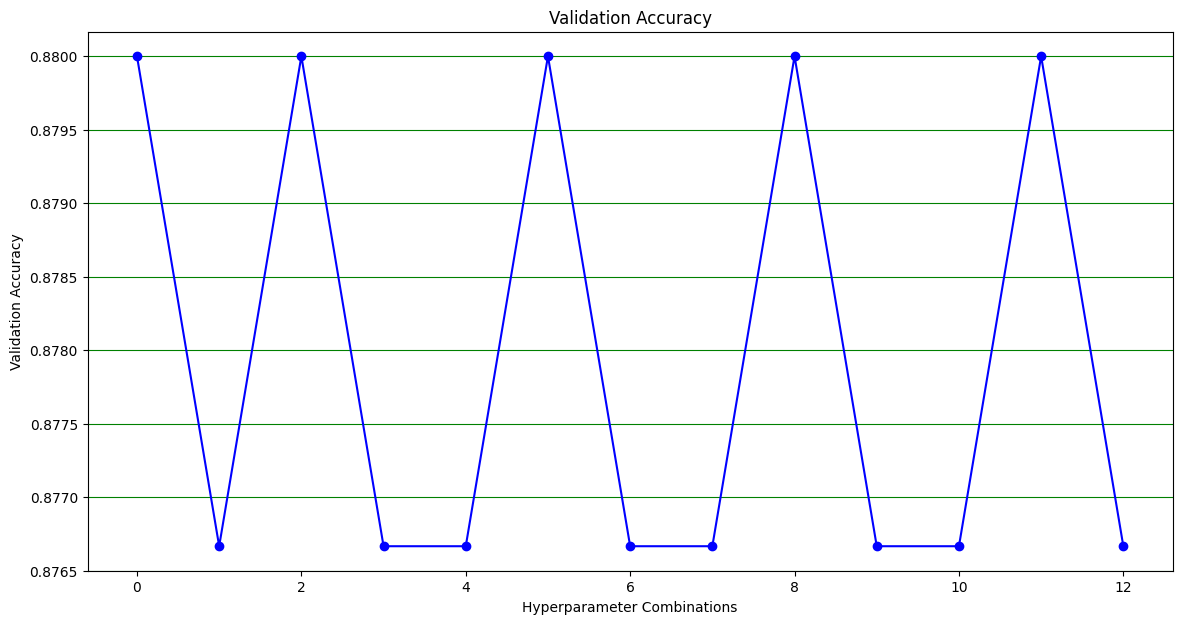

In [24]:
parameter_combination = []
for solver in ["svd", "lsqr", "eigen"]:
    if solver == "svd":
        parameter_combination.append({"solver": solver, "shrinkage": None})
    else:
        for shrink in ["auto", 0.1, 0.3, 0.5, 0.7, 0.9]:
            parameter_combination.append({
                "solver": solver,
                "shrinkage": shrink
            })
apply_lle(model="lda", parameter_combination=parameter_combination)

## Final Model Selection – SVM without Dimensionality Reduction

After experimenting with multiple classifiers (SVM, Naive Bayes, LDA) and dimensionality reduction methods (PCA, LLE), we selected the final model based on **validation accuracy**.

---

### Summary of Results

| Model        | Dimensionality Reduction | Best Accuracy |
|--------------|---------------------------|----------------|
| **SVM**       | None                    | **0.96** ✅     |
| SVM          | PCA (10)                 | 0.94           |
| SVM          | LLE (8)                   | 0.92           |
| **Naive Bayes** | None                    | 0.87           |
| Naive Bayes | PCA (100)                 | 0.91           |
| Naive Bayes | LLE (5)                   | 0.88           |
| **LDA**        | None                    | **0.93**        |
| LDA          | PCA (100)                 | 0.93           |
| LDA          | LLE (8)                   | 0.89           |

---

### Final Choice: SVM without Dimensionality Reduction

- **Kernel**: `'rbf'`
- **C**: `10`
- **Gamma**: `'scale'`

This setup achieved the **highest validation accuracy (0.96)** among all tested models and configurations. While dimensionality reduction helped some models like Naive Bayes and LDA, the best-performing model was SVM trained directly on the full original data (784 features).

---

>  **Conclusion**: For this classification task, **SVM without any dimensionality reduction** is the most accurate and reliable choice.


In [25]:
clf = SVC(C=10, kernel="rbf", gamma="scale")
clf.fit(Xtrain,ytrain)
print(f"Test accuracy: {clf.score(Xtest,ytest):.3f}")

Test accuracy: 0.967


In [26]:
clf_result = clf.predict(evaluate_df.drop(columns=["ID"]))
df = pd.DataFrame( {"ID" : evaluate_df["ID"],"label" : clf_result})
df.to_csv("results.csv", index=False)